# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns


np.random.seed(0)

# Data

In [2]:
from keras.datasets import mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#print(x_train.shape, y_train.shape)
#print(x_test.shape, y_test.shape)
print(y_train)

[5 0 4 ... 5 6 8]


# Exemplos

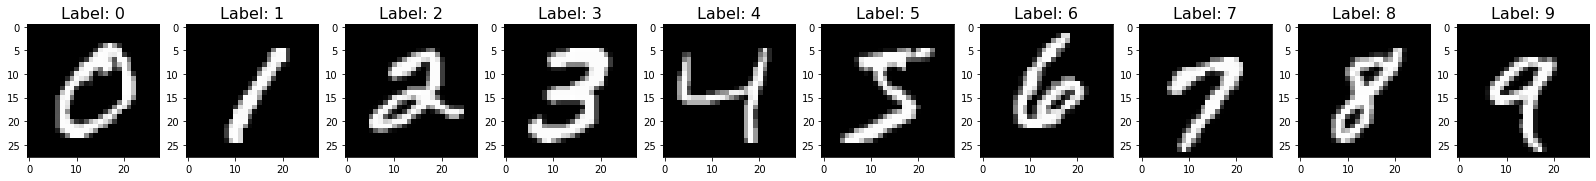

In [5]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(28,28))
for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize = 16)


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
for i in range(0,10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
#Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
#Reshape
#(60000, 28 , 28) to (60000, 784)
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

(60000, 784)


# Criando o modelo

In [14]:
model = Sequential()
model.add(Dense(units=128, input_shape= (784,), activation = "sigmoid"))
model.add(Dense(units=128, activation = "sigmoid"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Treinamento

In [15]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size = batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 1s 5ms/step - loss: 1.5163 - accuracy: 0.5472
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 0.5279 - accuracy: 0.8606
Epoch 3/10
118/118 [==============================] - 1s 4ms/step - loss: 0.3585 - accuracy: 0.9002
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2999 - accuracy: 0.9148
Epoch 5/10
118/118 [==============================] - 1s 4ms/step - loss: 0.2619 - accuracy: 0.9240
Epoch 6/10
118/118 [==============================] - 1s 4ms/step - loss: 0.2344 - accuracy: 0.9319
Epoch 7/10
118/118 [==============================] - 1s 4ms/step - loss: 0.2110 - accuracy: 0.9394
Epoch 8/10
118/118 [==============================] - 1s 4ms/step - loss: 0.1926 - accuracy: 0.9442
Epoch 9/10
118/118 [==============================] - 1s 4ms/step - loss: 0.1755 - accuracy: 0.9492
Epoch 10/10
118/118 [==============================] - 1s 4ms/step - loss: 0.1620 - accuracy: 0.9534

# Performance do treinamento

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: {}, Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.1447 - accuracy: 0.9573
Loss: 0.1447197049856186, Accuracy: 0.9573000073432922


# Prova

In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis=1)

313/313 [==============================] - 0s 761us/step


32


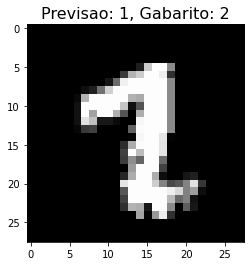

In [15]:
contador = 0
while True:
    contador += 1
    random_index = np.random.choice(len(x_test))
    x_sample = x_test[random_index]
    y_true = np.argmax(y_test, axis=1)
    y_sample_true = y_true[random_index]
    y_sample_predicted_class = y_pred_classes[random_index]
    if(y_sample_predicted_class != y_sample_true):
        break
plt.title("Previsao: {}, Gabarito: {}".format(y_sample_predicted_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap="gray")
print(contador)

# Resultados (Confusion Matrix)

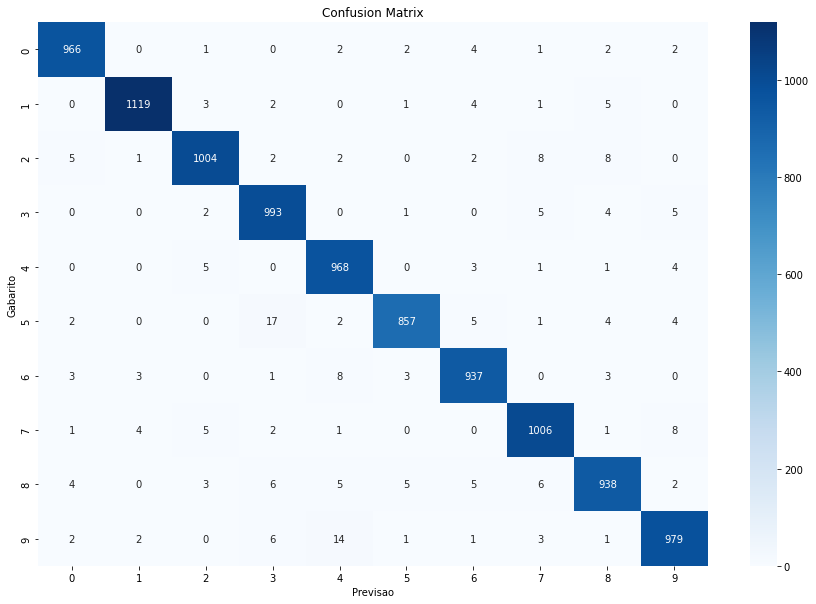

In [16]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap = "Blues")
ax.set_xlabel('Previsao')
ax.set_ylabel('Gabarito')
ax.set_title('Confusion Matrix');

# Erros

In [17]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [29]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

sorted_index_diff_errors = np.argsort(diff_errors_pred_true)
top_index_diff_errors = sorted_index_diff_errors[-10:]

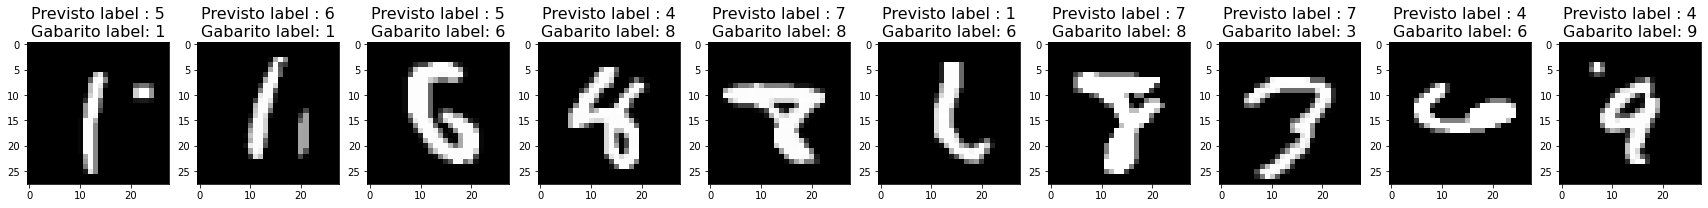

In [33]:
num = len(top_index_diff_errors)
f, ax = plt.subplots(1, num, figsize = (30, 30))

for i in range(0, num):
    index = top_index_diff_errors[i]
    sample = x_test_errors[index].reshape(28, 28)
    y_t = y_true_errors[index]
    y_p = y_pred_classes_errors[index]
    ax[i].imshow(sample, cmap ='gray')
    ax[i].set_title("Previsto label : {}\nGabarito label: {}".format(y_p, y_t), fontsize = 16)